<a href="https://colab.research.google.com/github/GowthamNemo/Gamingml/blob/main/Gaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df=pd.read_csv("gaming.csv")

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales,EurpeanUnion_Sales,Japan_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,12.88,3.79,NaN,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,NaN,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales,EurpeanUnion_Sales,Japan_Sales,Other_Sales,Global_Sales
194,220,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
195,221,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2.57,1.57,0.44,0.21,4.79
196,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
197,223,Batman: Arkham City,X360,2011,Action,Warner Bros. Interactive Entertainment,2.99,1.31,0.04,0.41,4.76
198,224,Driver 2,PS,2000,Action,NaN,2.36,2.10,0.02,0.25,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                199 non-null    int64  
 1   Name                199 non-null    object 
 2   Platform            199 non-null    object 
 3   Year                199 non-null    int64  
 4   Genre               199 non-null    object 
 5   Publisher           198 non-null    object 
 6   NorthAmerica_Sales  185 non-null    float64
 7   EurpeanUnion_Sales  190 non-null    float64
 8   Japan_Sales         189 non-null    float64
 9   Other_Sales         192 non-null    float64
 10  Global_Sales        187 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.2+ KB


In [ ]:
df.describe()

,Rank,Year,NorthAmerica_Sales,EurpeanUnion_Sales,Japan_Sales,Other_Sales,Global_Sales
count,199.000000,199.000000,185.000000,190.000000,189.000000,192.000000,187.000000
mean,110.075377,2005.201005,4.701189,3.046368,1.342169,0.813490,9.861658
std,64.928627,7.452869,4.800238,2.856300,1.723777,0.852163,8.301009
min,1.000000,1982.000000,0.000000,0.000000,0.000000,0.000000,4.760000
25%,55.500000,1999.000000,2.590000,1.632500,0.080000,0.297500,5.465000
50%,107.000000,2007.000000,3.280000,2.270000,0.650000,0.630000,7.130000
75%,163.500000,2011.000000,5.170000,3.470000,2.020000,1.012500,10.630000
max,224.000000,2016.000000,41.490000,29.020000,10.220000,8.460000,82.740000


In [ ]:
df.shape

(199, 11)

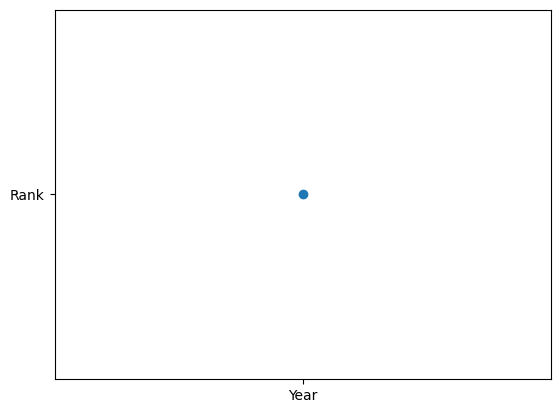

In [ ]:
x="Year"
y="Rank"
plt.scatter(x,y)
plt.show()


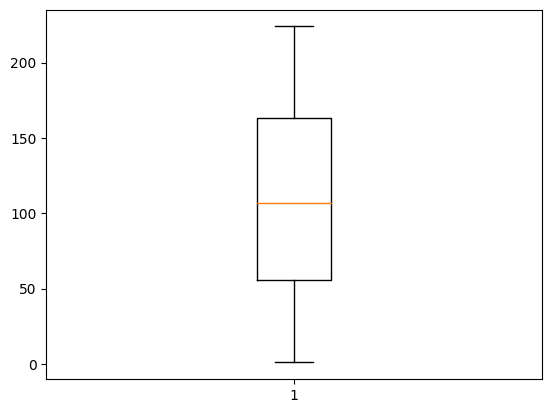

In [ ]:
x=df["Rank"]
plt.boxplot(x)
plt.show()

In [ ]:
x = df.drop('Year',axis=1)
y=df['Year']

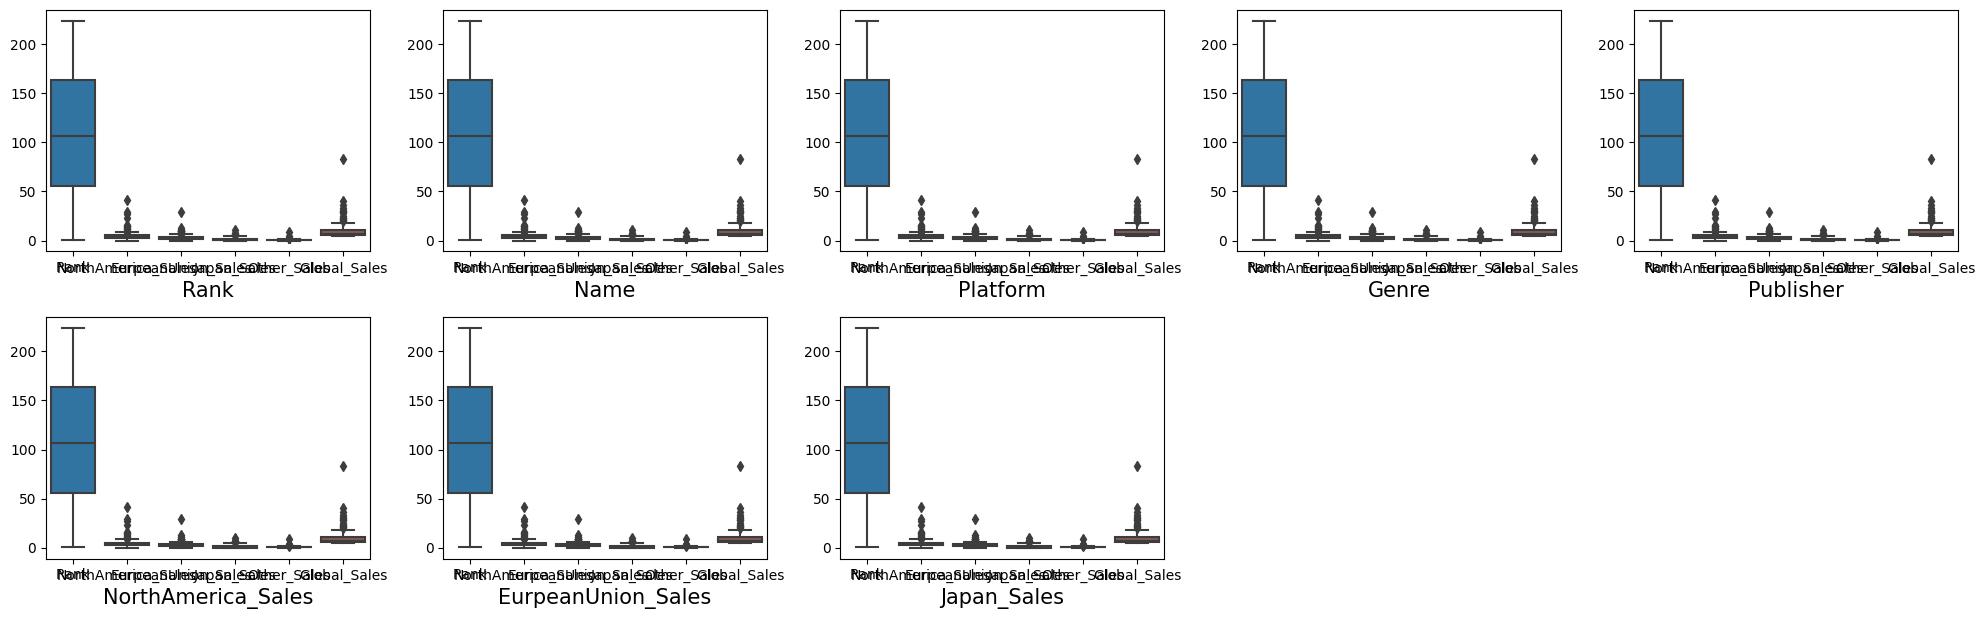

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
  if plotnumber <=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(x)
    plt.xlabel(col,fontsize=15)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
df.isna().sum()

Rank                   0
Name                   0
Platform               0
Year                   0
Genre                  0
Publisher              1
NorthAmerica_Sales    14
EurpeanUnion_Sales     9
Japan_Sales           10
Other_Sales            7
Global_Sales          12
dtype: int64

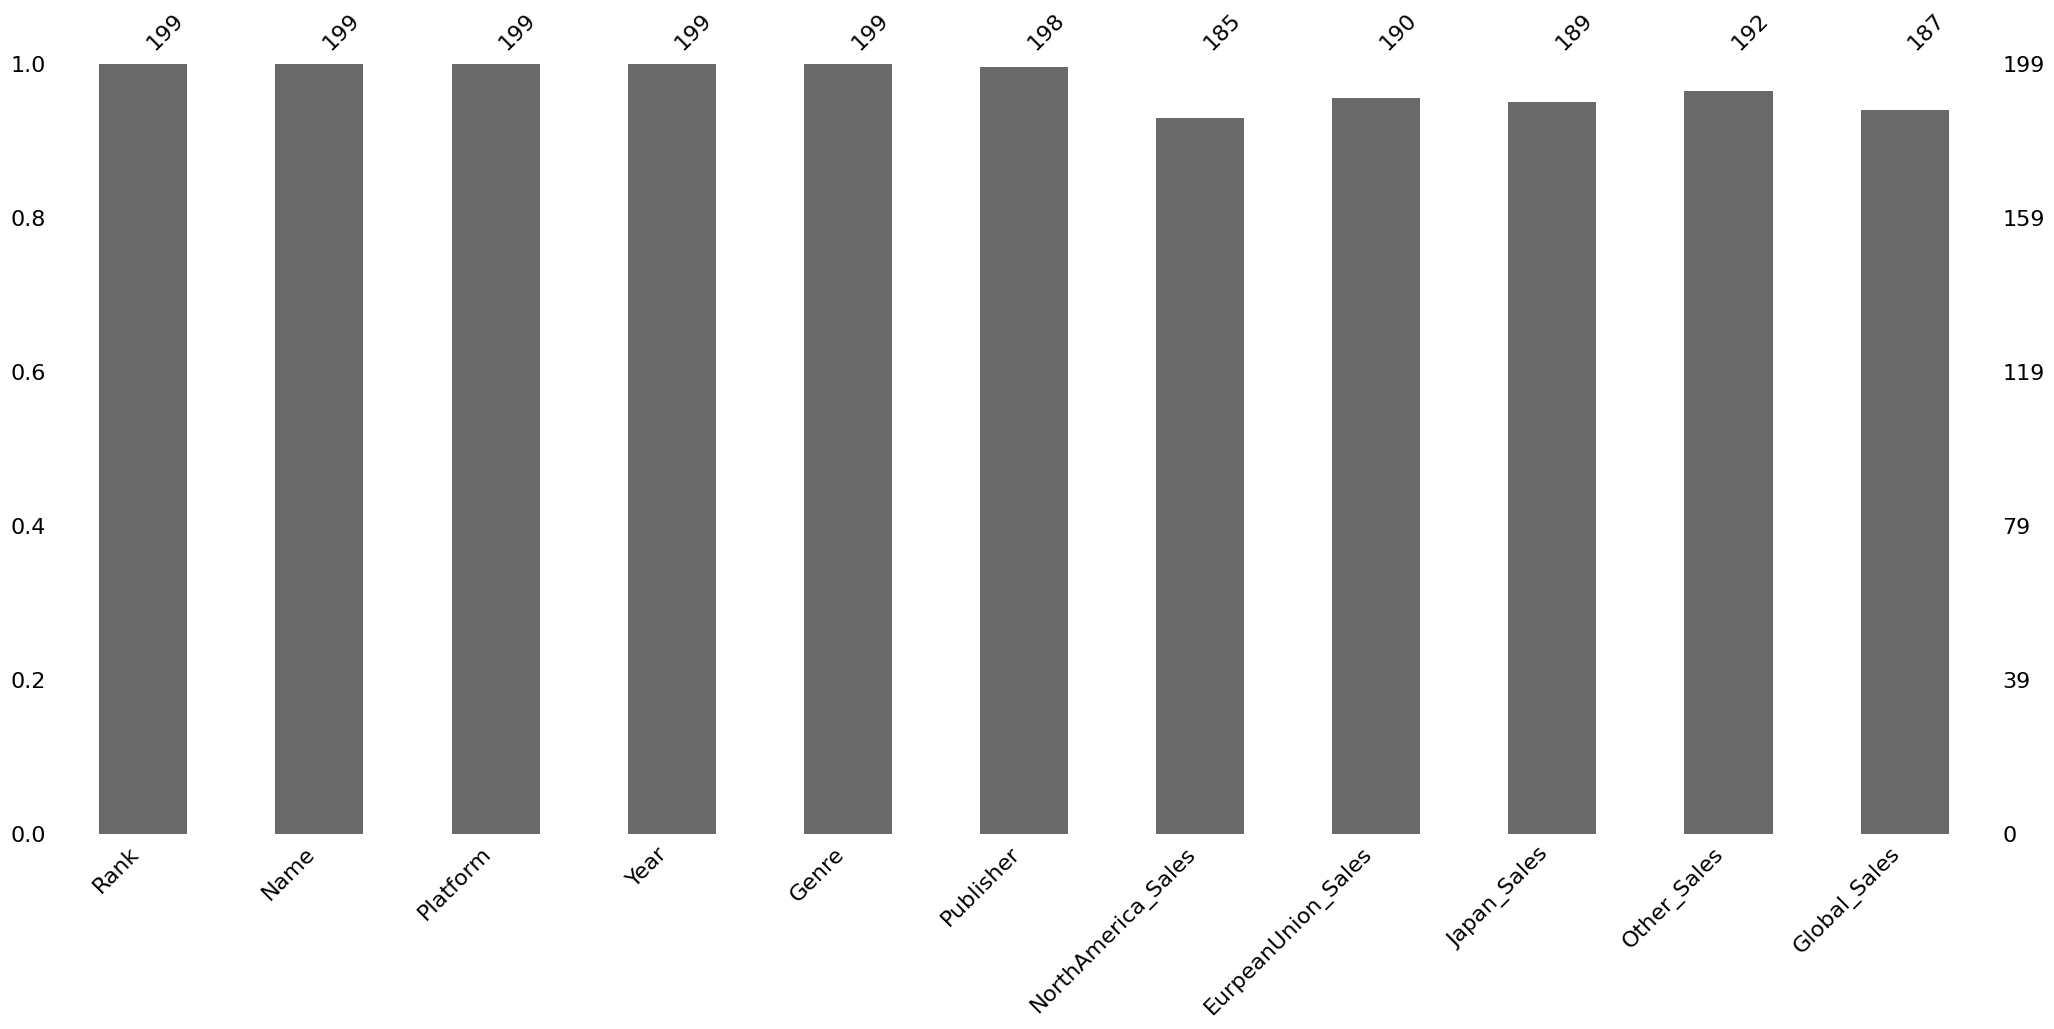

In [ ]:
import missingno as msno

msno.bar(df)
plt.show()


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

ValueError: ignored

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=clf.predict(x_test)


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[198,  55],
       [ 57,  74]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7083333333333334

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

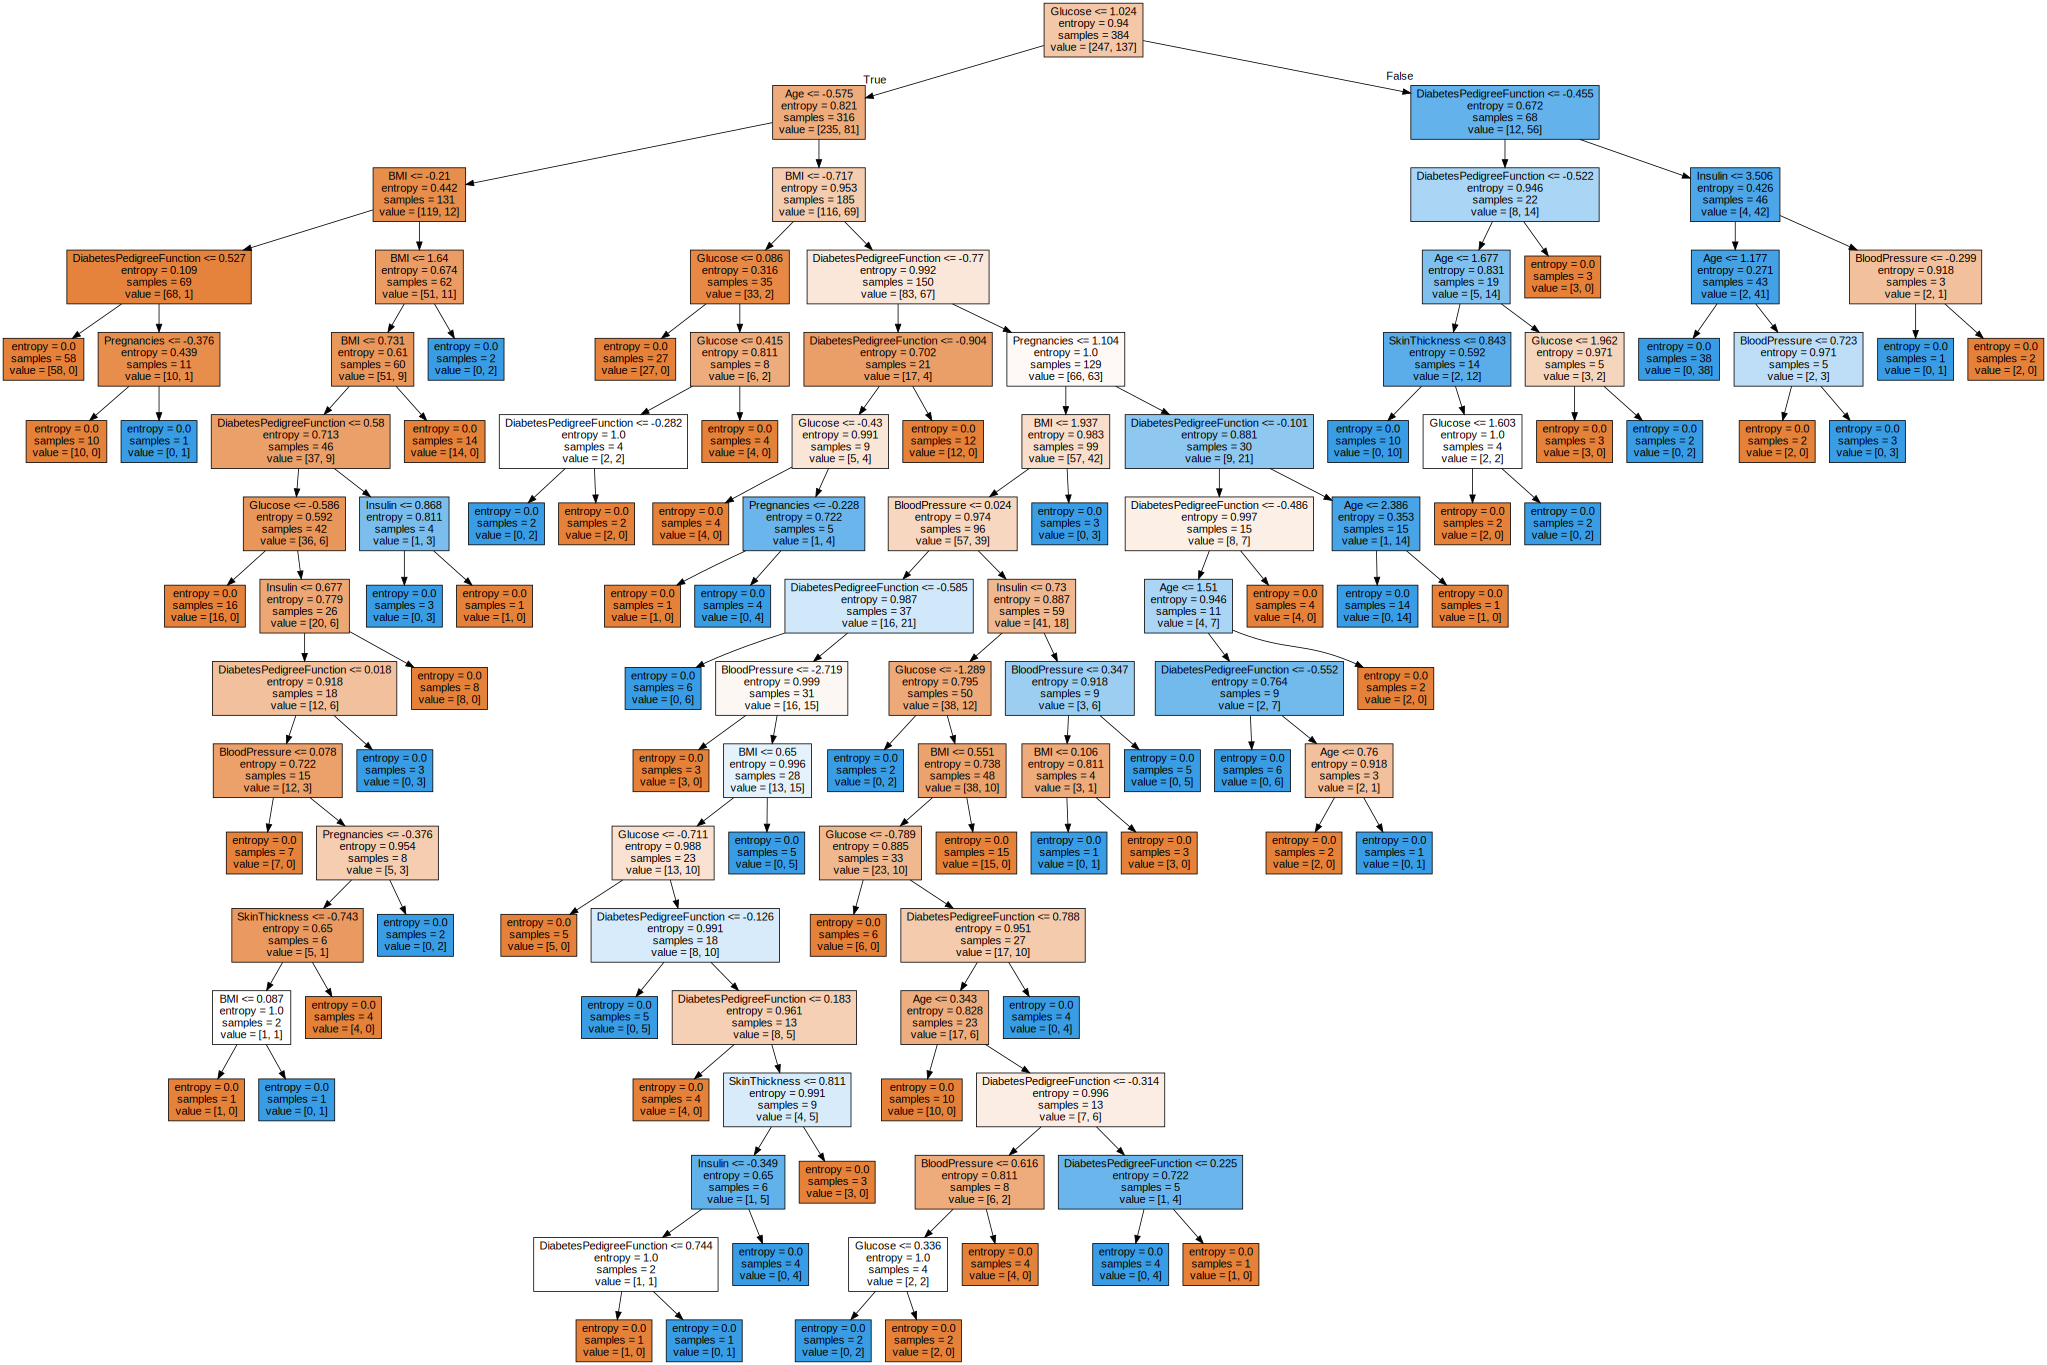

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))